In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df=df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

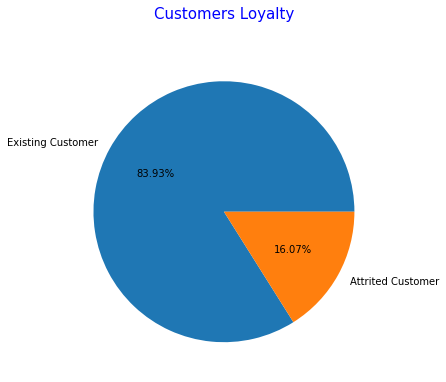

In [12]:
labels=['Existing Customer','Attrited Customer']
plt.figure(figsize=(11,6))
plt.pie(df.Attrition_Flag.value_counts(),labels=labels,autopct='%1.2f%%')
plt.title('Customers Loyalty',loc='center',color='blue',pad=30, fontsize=15)
plt.show()

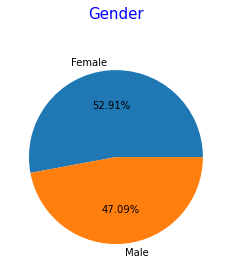

In [13]:
labels='Female','Male'
plt.pie(df.Gender.value_counts(),labels=labels,autopct='%1.2f%%')
plt.title('Gender',loc='center',color='blue',pad=30, fontsize=15)
plt.show()

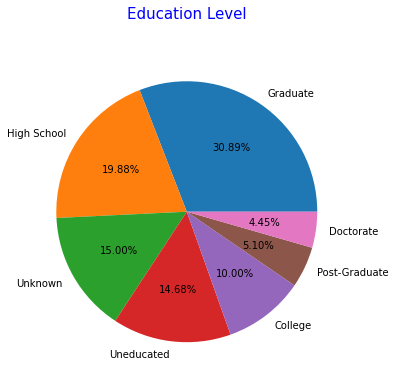

In [16]:
labels=['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate']
plt.figure(figsize=(11,6))
plt.pie(df.Education_Level.value_counts(),labels=labels,autopct='%1.2f%%')
plt.title('Education Level',loc='center',color='blue',pad=30, fontsize=15)
plt.show()

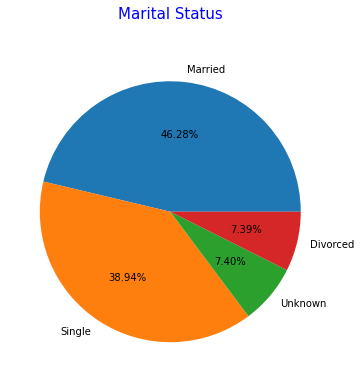

In [17]:
labels=['Married','Single','Unknown','Divorced']
plt.figure(figsize=(11,6))
plt.pie(df.Marital_Status.value_counts(),labels=labels,autopct='%1.2f%%')
plt.title('Marital Status',loc='center',color='blue',pad=30, fontsize=15)
plt.show()

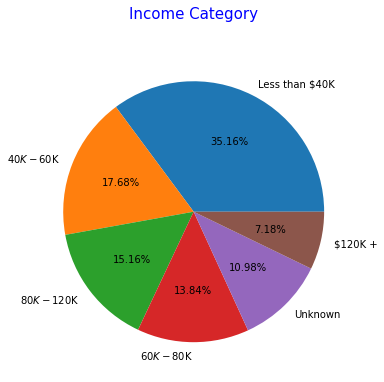

In [19]:
labels=['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','Unknown','$120K +']
plt.figure(figsize=(11,6))
plt.pie(df.Income_Category.value_counts(),labels=labels,autopct='%1.2f%%')
plt.title('Income Category',loc='center',color='blue',pad=30, fontsize=15)
plt.show()

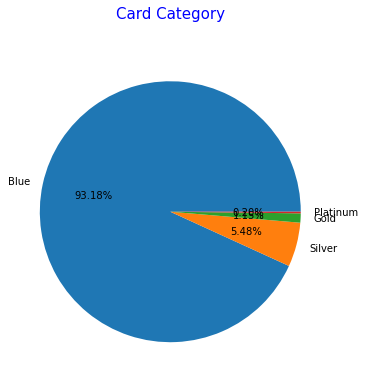

In [20]:
labels=['Blue','Silver','Gold','Platinum']
plt.figure(figsize=(11,6))
plt.pie(df.Card_Category.value_counts(),labels=labels,autopct='%1.2f%%')
plt.title('Card Category',loc='center',color='blue',pad=30, fontsize=15)
plt.show()

In [22]:
df['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

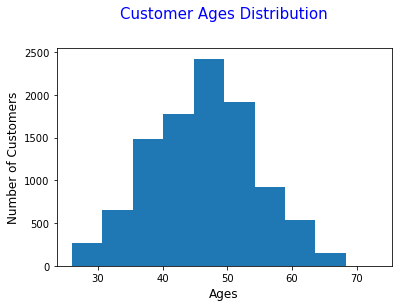

In [23]:
plt.hist(df['Customer_Age'])
plt.title('Customer Ages Distribution',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Ages', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [27]:
df['Dependent_count'].describe()

count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

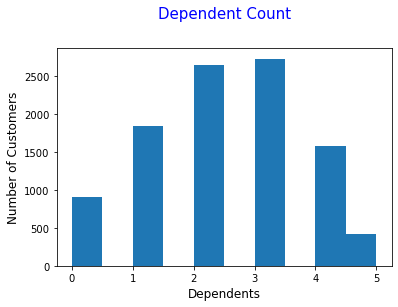

In [26]:
plt.hist(df['Dependent_count'])
plt.title('Dependent Count',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Dependents', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [29]:
df['Months_on_book'].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

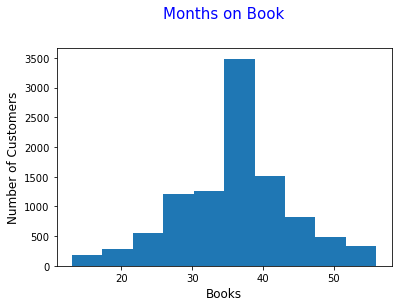

In [28]:
plt.hist(df['Months_on_book'])
plt.title('Months on Book',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Books', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [31]:
df['Total_Relationship_Count'].describe()

count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64

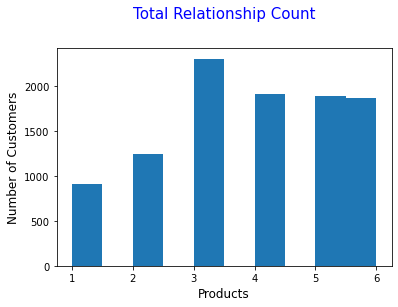

In [30]:
plt.hist(df['Total_Relationship_Count'])
plt.title('Total Relationship Count',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Products', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [34]:
df.Months_Inactive_12_mon.describe()

count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64

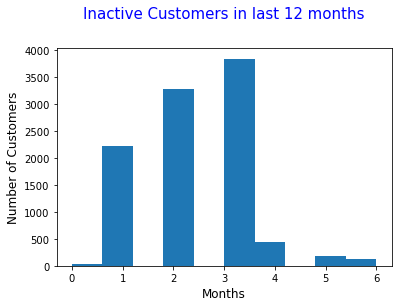

In [33]:
plt.hist(df.Months_Inactive_12_mon)
plt.title('Inactive Customers in last 12 months',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [36]:
df.Contacts_Count_12_mon.describe()

count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64

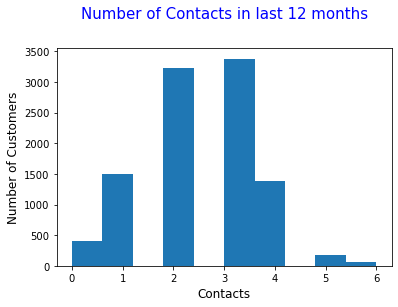

In [35]:
plt.hist(df.Contacts_Count_12_mon)
plt.title('Number of Contacts in last 12 months',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Contacts', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [40]:
df.Credit_Limit.describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

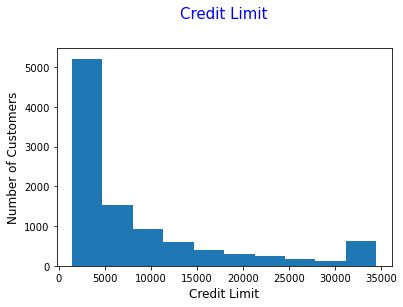

In [39]:
plt.hist(df.Credit_Limit)
plt.title('Credit Limit',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Credit Limit', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [43]:
df.Total_Revolving_Bal.describe()

count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

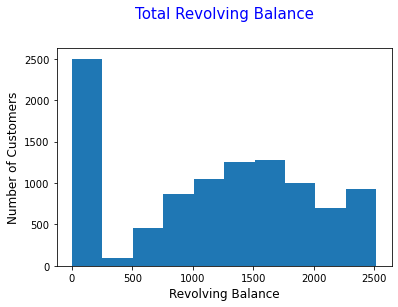

In [42]:
plt.hist(df.Total_Revolving_Bal)
plt.title('Total Revolving Balance',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Revolving Balance', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [45]:
df.Avg_Open_To_Buy.describe()

count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64

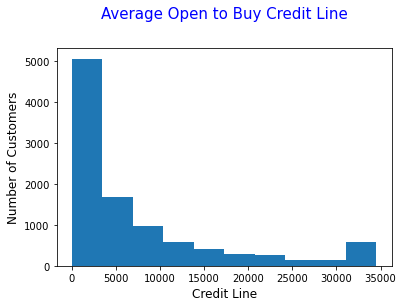

In [49]:
plt.hist(df.Avg_Open_To_Buy)
plt.title('Average Open to Buy Credit Line',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Credit Line', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [47]:
df.Total_Amt_Chng_Q4_Q1.describe()

count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

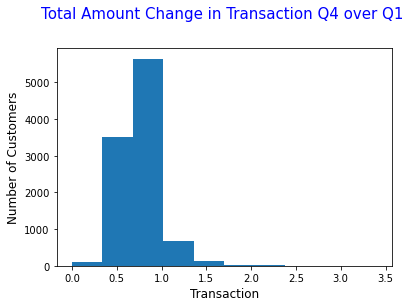

In [51]:
plt.hist(df.Total_Amt_Chng_Q4_Q1)
plt.title('Total Amount Change in Transaction Q4 over Q1 ',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Transaction', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [54]:
df.Total_Trans_Amt.describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

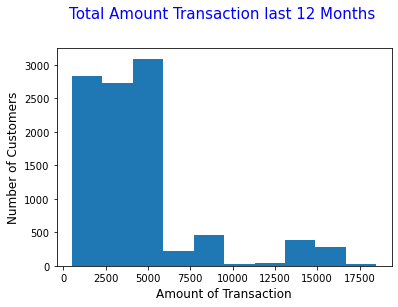

In [53]:
plt.hist(df.Total_Trans_Amt)
plt.title('Total Amount Transaction last 12 Months ',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Amount of Transaction', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

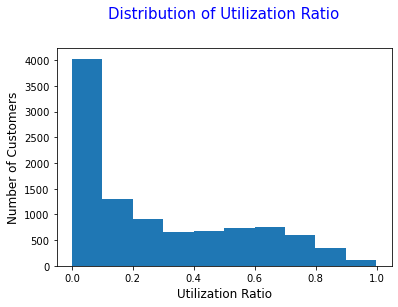

In [56]:
plt.hist(df.Avg_Utilization_Ratio)
plt.title('Distribution of Utilization Ratio',loc='center',color='blue',pad=30, fontsize=15)
plt.xlabel('Utilization Ratio', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

In [58]:
df.Avg_Utilization_Ratio.describe()

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

In [57]:
print('Average Utilization Ratio:',df.Avg_Utilization_Ratio.mean()*100,'%')

Average Utilization Ratio: 27.489355189098454 %


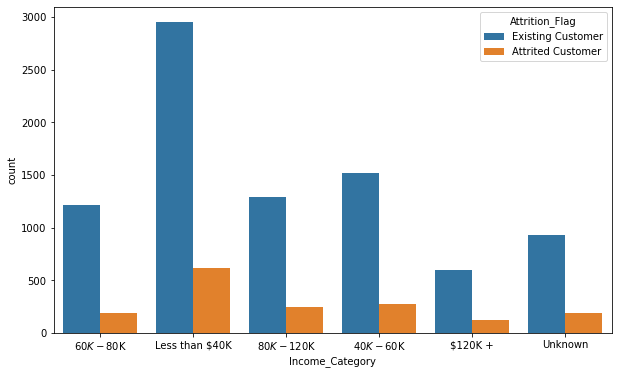

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag')
plt.show()

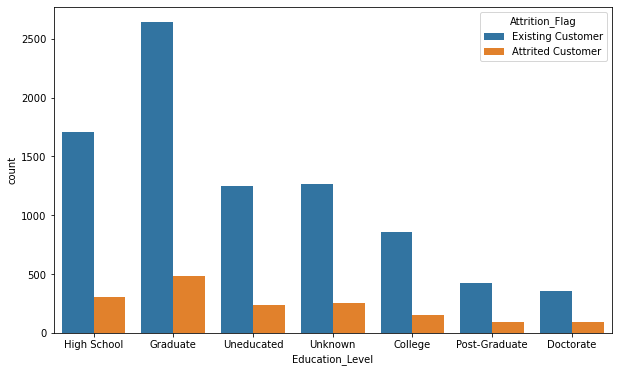

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.xlabel('Income Category')
plt.show()

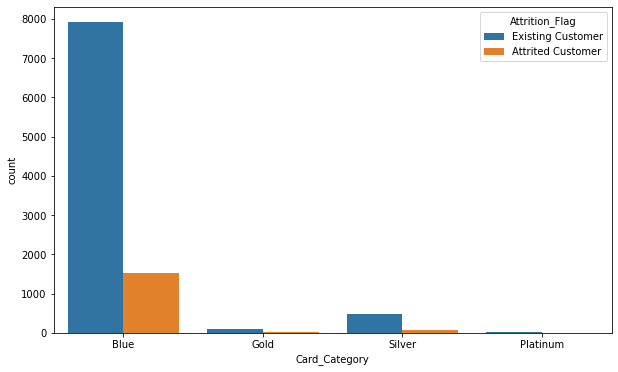

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag')
plt.xlabel('Income Category')
plt.show()

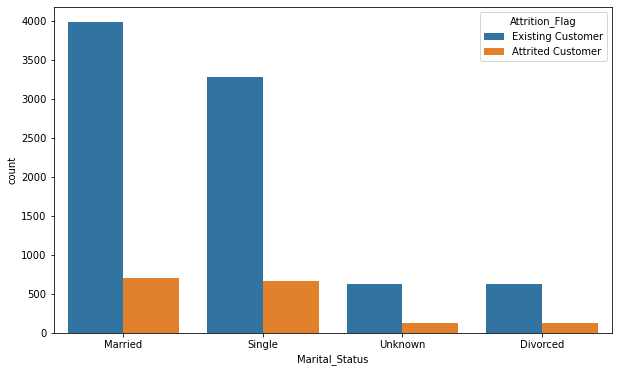

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag')
plt.xlabel('Income Category')
plt.show()

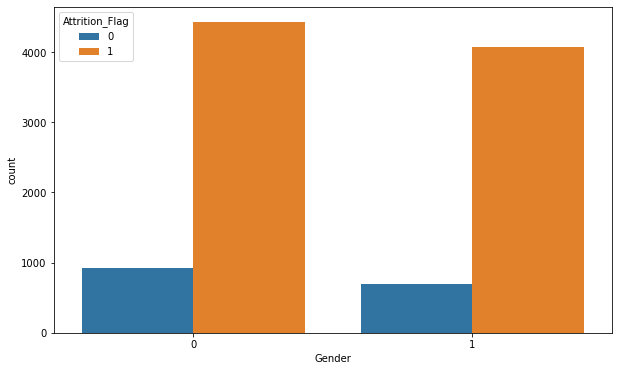

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')
plt.xlabel('Gender')
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number: continue
   
    df[column] = LabelEncoder().fit_transform(df[column])


In [65]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,19,1,3,3,1,2,0,26,4,1,3,12691.0,324,11914.0,1.335,217,32,1.625,0.061
1,1,23,0,5,2,2,4,0,31,5,1,2,8256.0,408,7392.0,1.541,338,23,3.714,0.105
2,1,25,1,3,2,1,3,0,23,3,1,0,3418.0,0,3418.0,2.594,893,10,2.333,0.000
3,1,14,0,4,3,3,4,0,21,2,4,1,3313.0,1973,796.0,1.405,236,10,2.333,0.760
4,1,14,1,3,5,1,2,0,8,4,1,0,4716.0,0,4716.0,2.175,65,18,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,24,1,2,2,2,1,0,27,2,2,3,4003.0,1382,2152.0,0.703,4874,107,0.857,0.462
10123,0,15,1,2,6,0,1,0,12,3,2,3,4277.0,1698,2091.0,0.804,4244,59,0.683,0.511
10124,0,18,0,1,3,1,4,0,23,4,3,4,5409.0,0,5409.0,0.819,4351,50,0.818,0.000
10125,0,4,1,2,2,3,1,0,23,3,3,3,5281.0,0,5281.0,0.535,4160,52,0.722,0.000


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [66]:
from sklearn.model_selection import train_test_split
x = df.drop('Attrition_Flag', axis = 1) 
y = df['Attrition_Flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100,shuffle=True)

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)
 
score_train = cross_val_score(lg, x_train, y_train, cv=5, scoring="accuracy")
score_test = cross_val_score(lg, x_test, y_test, cv=5, scoring="accuracy")

print('Train Score:',int(score_train.mean()*100),'%')
print('Test Score:',int(score_test.mean()*100),'%')

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Train Score: 88 %
Test Score: 88 %


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

score_train = cross_val_score(rf, x_train, y_train, cv=5, scoring="accuracy")
score_test = cross_val_score(rf, x_test, y_test, cv=5, scoring="accuracy")


print('Train Score:',int(score_train.mean()*100),'%')
print('Test Score:',int(score_test.mean()*100),'%')

Train Score: 95 %
Test Score: 95 %


In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)

score_train = cross_val_score(gbc, x_train, y_train, cv=5, scoring="accuracy")
score_test = cross_val_score(gbc, x_test, y_test, cv=5, scoring="accuracy")


print('Train Score:',int(score_train.mean()*100),'%')
print('Test Score:',int(score_test.mean()*100),'%')

Train Score: 96 %
Test Score: 96 %


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred=dt.predict(x_test)

score_train = cross_val_score(dt, x_train, y_train, cv=5, scoring="accuracy")
score_test = cross_val_score(dt, x_test, y_test, cv=5, scoring="accuracy")


print('Train Score:',int(score_train.mean()*100),'%')
print('Test Score:',int(score_test.mean()*100),'%')

Train Score: 93 %
Test Score: 92 %


In [83]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
etc_pred=etc.predict(x_test)

score_train = cross_val_score(etc, x_train, y_train, cv=5, scoring="accuracy")
score_test = cross_val_score(etc, x_test, y_test, cv=5, scoring="accuracy")


print('Train Score:',int(score_train.mean()*100),'%')
print('Test Score:',int(score_test.mean()*100),'%')

Train Score: 93 %
Test Score: 93 %


In [84]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train, y_train)
gn_pred=gn.predict(x_test)

print('Train Score:',int(score_train.mean()*100),'%')
print('Test Score:',int(score_test.mean()*100),'%')

Train Score: 93 %
Test Score: 93 %


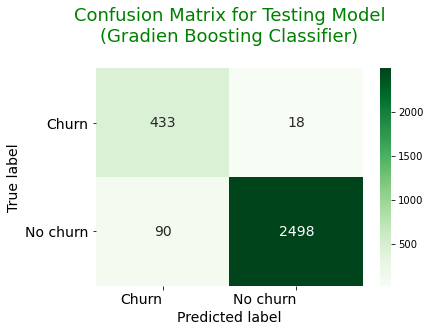

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(gbc_pred, y_test)), ('Churn','No churn', ), ('Churn','No churn', ))


plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Greens')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradien Boosting Classifier)\n', fontsize=18, color='green')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()